In [1]:
### Check which GPU is in use

!nvidia-smi

Tue May  4 13:02:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 43kB/s 


In [3]:
### Installing tensorflow and checking the version

import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
# Importing all necessaries libraries

from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
from glob import glob

In [5]:
### Resizing all images

IMAGE_SIZE=[224,224]

In [6]:
### Read the data from the drive

train_path='/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Train'
test_path='/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Test'

In [7]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
for layer in vgg16.layers:
  layer.trainable=False

In [9]:
folders=glob('/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Train/*')

In [10]:
folders

['/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Train/Yes',
 '/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Train/No']

In [11]:
x=Flatten()(vgg16.output)

In [12]:
prediction=Dense(len(folders),activation='softmax')(x)

In [13]:
model=Model(inputs=vgg16.input,outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True
                                  )
test_datagen=ImageDataGenerator(rescale=1./255)

In [17]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Train',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 300 images belonging to 2 classes.


In [18]:
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Test',
                                               target_size=(224,224),
                                               batch_size=16,
                                               class_mode='categorical')

Found 100 images belonging to 2 classes.


In [19]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
19/19 [==============================] - 231s 11s/step - loss: 1.1862 - accuracy: 0.5891 - val_loss: 0.7549 - val_accuracy: 0.7000
Epoch 2/100
19/19 [==============================] - 7s 344ms/step - loss: 0.6374 - accuracy: 0.8009 - val_loss: 0.3979 - val_accuracy: 0.8500
Epoch 3/100
19/19 [==============================] - 7s 348ms/step - loss: 0.2774 - accuracy: 0.8856 - val_loss: 0.3653 - val_accuracy: 0.8600
Epoch 4/100
19/19 [==============================] - 7s 350ms/step - loss: 0.2062 - accuracy: 0.9259 - val_loss: 0.2979 - val_accuracy: 0.8900
Epoch 5/100
19/19 [==============================] - 7s 346ms/step - loss: 0.1647 - accuracy: 0.9399 - val_loss: 0.4019 - val_accuracy: 0.8400
Epoch 6/100
19/19 [==============================] - 7s 346ms/step - loss: 0.1147 - accuracy: 0.9707 - val_loss: 0.3115 - val_accuracy: 0.8800
Epoch 7/100
19/19 [==============================] - 7s 347ms/step - loss: 0.1035 - accuracy: 0.9841 - val_loss: 0.3005 - val_accuracy: 0.8800

In [20]:
import matplotlib.pyplot as plt

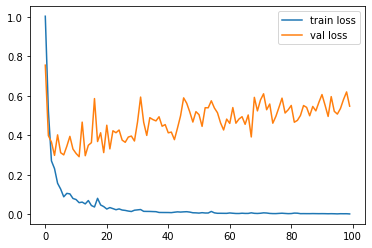

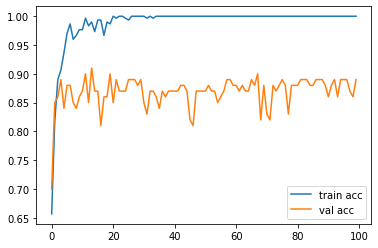

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
### Predictions
import numpy as np
from keras.preprocessing import image

In [23]:
test_image = image.load_img('/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Test/Yes/Y15.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: The person dont have brain Tumor.")
else:
  print("Prediction: The person have brain Tumor.")

Prediction: The person have brain Tumor.


In [24]:
test_image = image.load_img('/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Test/No/No__0_6356.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
  print("Prediction: The person dont have brain Tumor.")
else:
  print("Prediction: The person have brain Tumor.")

Prediction: The person dont have brain Tumor.


In [26]:
model.save("/content/drive/MyDrive/Datasets/Brain Tumor/brain_tumor_dataset/Braintumour.h5")